# 5. Linear Regression and Relationships
### Regplot & Lmplot
* Regplots perform simple linear regressions.
* Lmplots combine regplots and facetgrids, so that you can build linear regressions and present them in a more attractive way and combine multiple subplots.

In [13]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show figures in notebook
%matplotlib inline

In [14]:
# load dataset
tips = sns.load_dataset('tips')

# peek at data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* **Regplots** are a scatter plot which provide a line of regression (a.k.a. best fit) along with a confidence interval/error range.
* The below plot shows there is a fairly strong linear relationship between the variables because the line passes consistently through the data which tends to increase as the other does, whilst not having a huge error range.

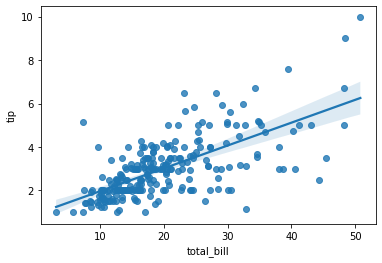

In [15]:
# plot bill vs. tip
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

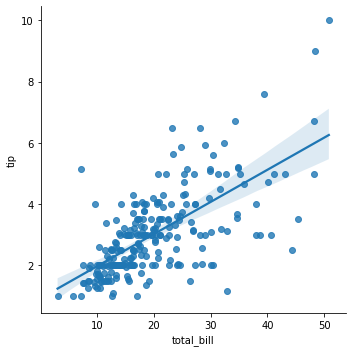

In [16]:
# similar to the above, just a slightly different scale size
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

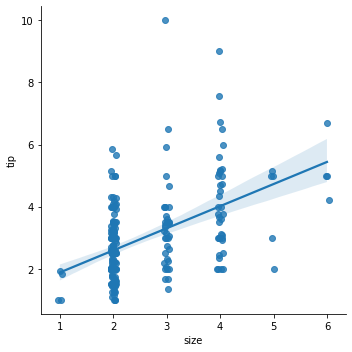

In [17]:
# plot size this time, using jitter to spread data points a little more
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.05)

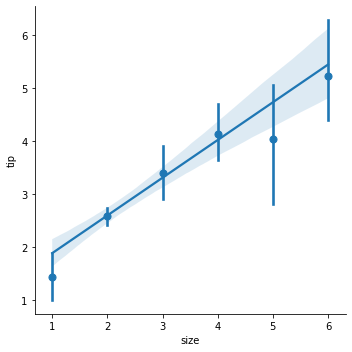

In [18]:
# show the mean for each x value (works well because of distinct x values)
# you could use np.median etc. as well
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)

* All of the above variables have linear relationships, which allow the linear regression plots to work well with them.
* We can also look at non-linear relationships between variables as below.

In [19]:
# load data
data = sns.load_dataset('anscombe')

# peek at data
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [20]:
# explore dataset variable
data['dataset'].value_counts()

IV     11
I      11
II     11
III    11
Name: dataset, dtype: int64

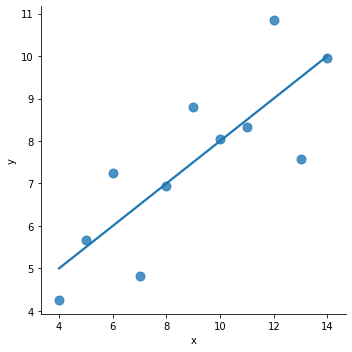

In [21]:
# plot dataset 1, turn off confidence intervals and set size of points
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'I'"),
           ci = None, scatter_kws = {'s' : 80})

* The below plot shows that dataset 2 appears to be polynomial, therefore a linear regression doesn't help us (at least with default settings).

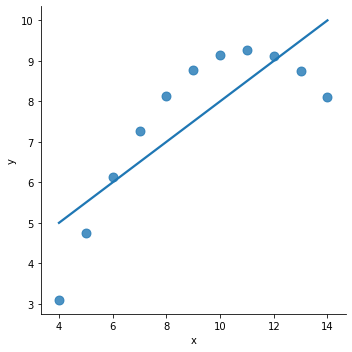

In [22]:
# same as above but dataset 2
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"),
           ci = None, scatter_kws = {'s' : 80})

* Changing the 'order' of our plot helps us to better fit our LOBF to the polynomial distribution.
* A polynomial regression is a special type of multiple linear regression, it is designed to fit data with non-linear relationships.

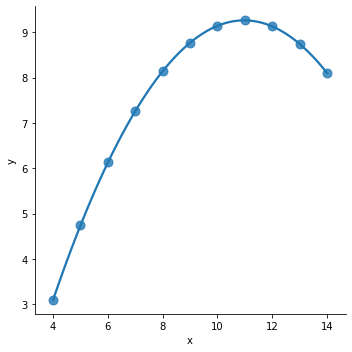

In [23]:
# re-plot dataset 2 but with changing order value
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"),
           ci = None, scatter_kws = {'s' : 80}, order = 2)

* Outliers have the ability to throw off line fitting.
* Below you can see that the outlier at x = 13 is causing the regression line to be pulled up and away from the actual trend.

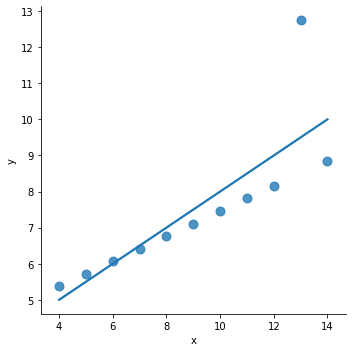

In [24]:
# plot dataset 3
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"),
           ci = None, scatter_kws = {'s' : 80})

* Setting the 'robust' parameter to true allows the model to ignore anything it deems to be an outlier and fit the model to the remaining data points.

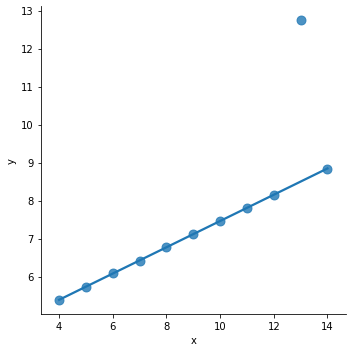

In [25]:
# plot dataset 3 and ignore outliers
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"),
           ci = None, scatter_kws = {'s' : 80}, robust = True)

* We can use hue, style and markers to alter appearance of plots.
* We can use col and row with categorical variables to separate plots into distinct analysis.

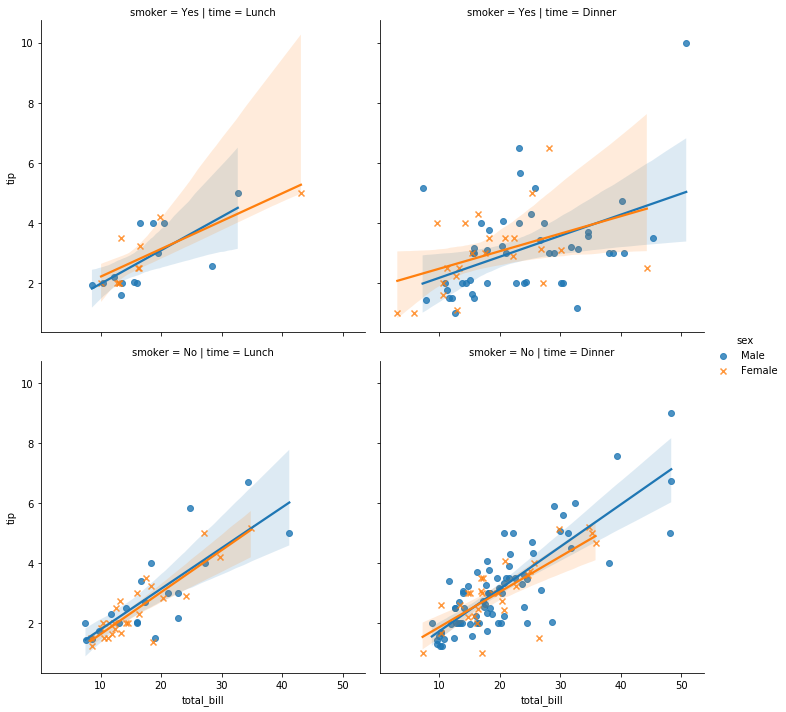

In [26]:
# play with appearance of plot
sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
           hue = 'sex', markers = ['o', 'x'],
           col = 'time', row = 'smoker')

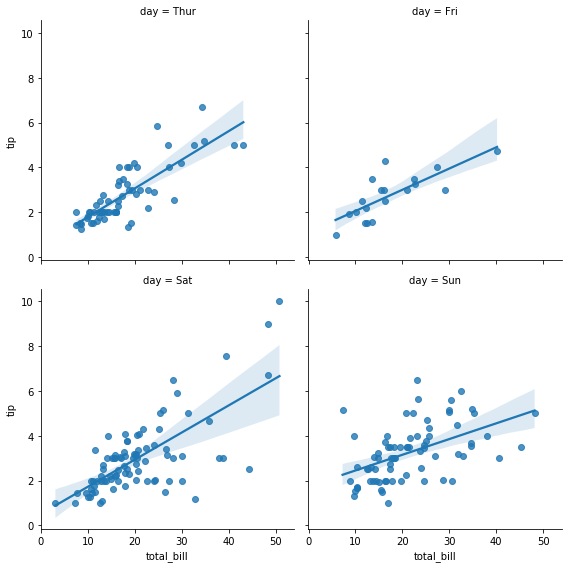

In [27]:
# adjust layout of multiple plots
sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
           col = 'day', col_wrap = 2, height = 4)

### Distribution Analysis
**Types of plots:**
* distplot()
* kdeplot()
* jointplot()
* rugplot()

**Visualising the distribution of data:**
* https://seaborn.pydata.org/tutorial/distributions.html

**Univariate Data (Distplot & Kdeplot):**
* Univariate data simply deals with one variable, so it doesn't look at relationships, causes etc. it simply looks at the distribution of a single variable.
* Distplots are good for this single variable investigation.
* You can configure things like whether or not the esitimator line shows (see shift + double tab as always for options) and below we have also turned on rug plot which represents the distribution of points.

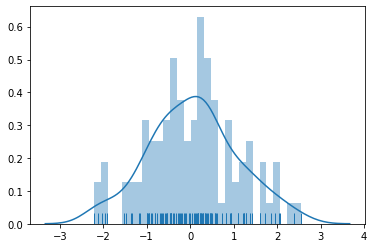

In [28]:
# create x variable (normal distribution)
x = np.random.randn(100)

# plot data
sns.distplot(x, kde = True, rug = True, bins = 30)

* Bandwidth ('bw' below) affects the shape of the kernel, a low bandwith will appear squiggly whilst a high bandwidth looks like a smooth line.
* This is because the bandwidth determines which points contribute to the shape of the line, a low bandwidth means only nearby points will affect the line, so it jumps and drops depending on the closest points only. Whilst a high bandwidth means distant points pull the line up and down to make it a smoother, more averaged line.

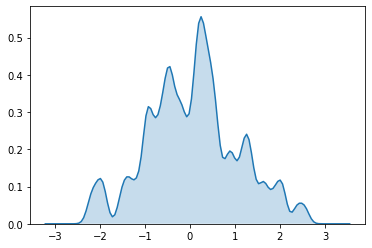

In [29]:
# kde plot, same as above except without histogram bins
sns.kdeplot(x, shade = True, cbar = True, bw = 0.1, cut = 10)

### Bivariate Analysis (jointplot & other):
* Jointplots show a scatter plot between 2 variables and also overlay distribution/histogram plots along the x and y axis for additional context.
* A jointplot is a combination of bivariate and univariate graphs in one.
* As always, there are configurable options such as the appearance of the scatterplot to come through as a hex grid for example.

In [30]:
# peek at data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


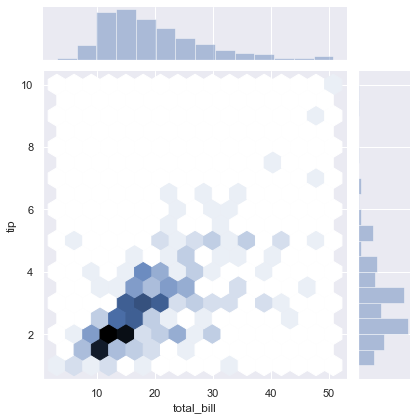

In [31]:
# extract values to plot
x = tips['total_bill']
y = tips['tip']

# auto adjust aesthetic properties (can put args between brackets for specific)
sns.set()

# plot data
sns.jointplot(x = x, y = y, kind = 'hex')

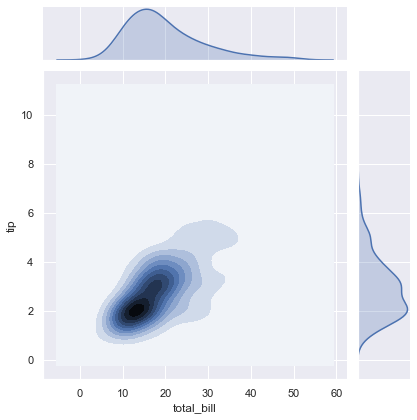

In [32]:
# plot data as kde
sns.jointplot(x = x, y = y, kind = 'kde')

* You really can customise seaborn charts incredibly well, the below data is presented almost as a heat map using the specific customisation tools in the colour map.
* Options like reverse and shade let you have fine control over what's being shown.

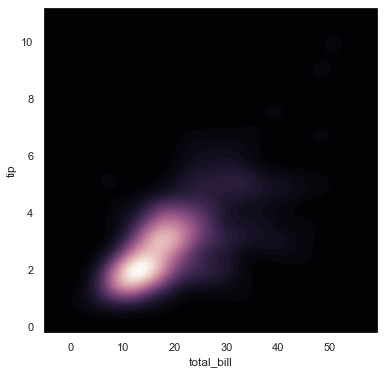

In [33]:
# customise plot layout, colours etc.
f, ax = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0,
                             light = 1, reverse = True)

# plot data
sns.kdeplot(x, y, cmap = cmap, n_levels = 60, shade =True)

* Jointplots allow you to use JointGrids to alter the figure, such as below where we use 'plot_joint' and 'ax_joint' to add an additional scatter plot over the top of our jointplot.
* 

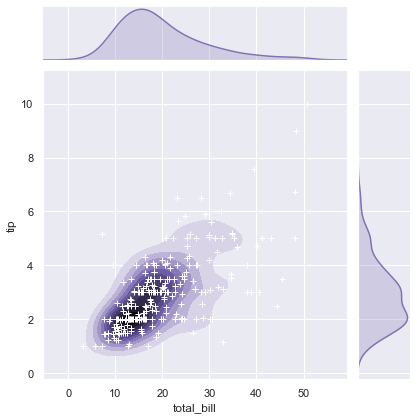

In [34]:
# plot data with custom colour
g = sns.jointplot(x, y, kind = 'kde', color = 'm')

# add a scatter plot over the top for additional context
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')

# join scatter plot to existing joint plot and make it opaque (alpha = transp.)
g.ax_joint.collections[0].set_alpha(0)

**Pairplots:**
* Pairplots will cross-plot all columns within a dataframe to show both the univariate distribution of each variable as well as the bivariate distribution of each combination of 2 columns within the dataframe.

In [35]:
# load data
iris = sns.load_dataset('iris')

# peek at data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


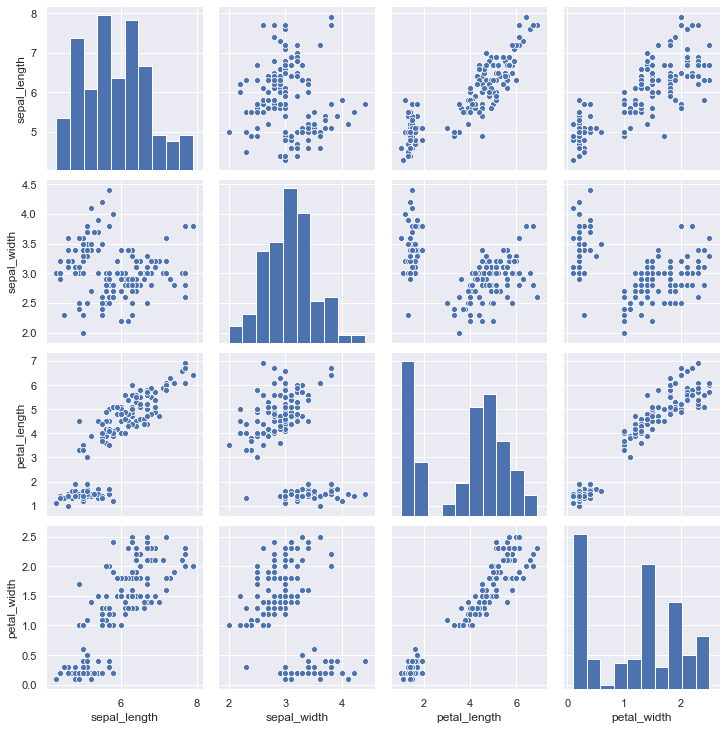

In [36]:
# pairplot of whole dataframe
sns.pairplot(iris)

* PairGrid lets you adjust a pairplot set of plots by overwriting the plot type.
* Below we have changed the histograms (i.e. univariate analysis of each df column) into kde plots using 'map_diag' whilst changing the scatter plots into kdeplots also using the map_offdiag.

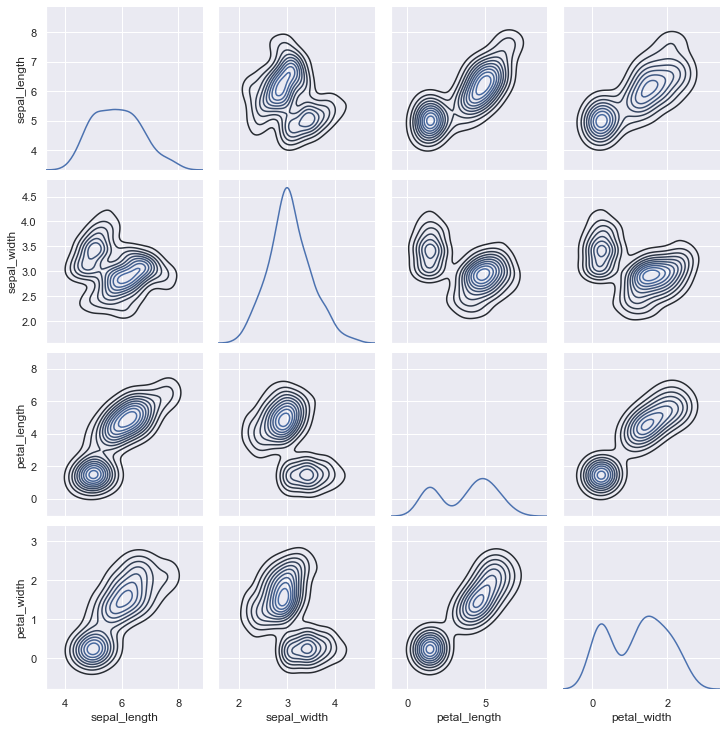

In [37]:
# pairgrid of data
g = sns.PairGrid(iris)

# adjust plot
g.map_diag(sns.kdeplot) # map a kdeplot in place of histograms
g.map_offdiag(sns.kdeplot, n_levels = 10) 